# Importing Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# Data Preperation

In [3]:
main_path = "/kaggle/input/digit-recognizer"
train_file = pd.read_csv(os.path.join(main_path, "train.csv"))
test_file  = pd.read_csv(os.path.join(main_path, "test.csv"))

In [5]:
n_h = n_w = 32
n_c = 3
m_train = len(train_file)
m_test = len(test_file)

In [6]:
train_images = np.zeros((m_train,n_h,n_w,n_c))
test_images = np.zeros((m_test,n_h,n_w,n_c))
train_labels = np.array(train_file.iloc[:,0])

In [7]:
for example in range(m_train):
    for i in range(3):
        train_images[example,:,:,i]= np.pad(train_file.iloc[example,1:].values.reshape(28,28),2,'constant')
for example in range(m_test):
    for i in range(3):
        test_images[example,:,:,i]= np.pad(test_file.iloc[example,:].values.reshape(28,28),2,'constant')
    

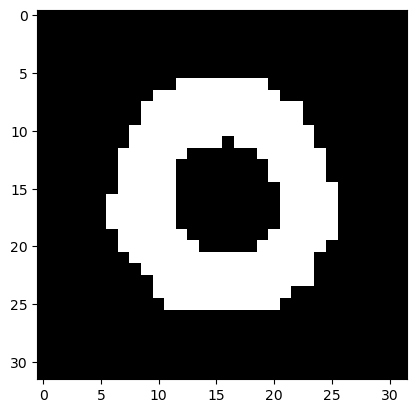

In [32]:
plt.imshow(train_images[1])
plt.show()

In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=27,
    width_shift_range=0.3,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.2,
    horizontal_flip=False)
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

In [10]:
train_images.shape

(42000, 32, 32, 3)

In [11]:
train_images, val_images, train_labels, val_labels = train_test_split(train_images, 
                                                                      train_labels,
                                                                      test_size=0.1, train_size=0.9,
                                                                      shuffle=True,
                                                                      random_state=44)


# VGG-16 Model Building

In [12]:
pre_model = tf.keras.applications.VGG16(input_shape=(32,32,n_c),include_top=False,weights="imagenet")

58889256/58889256 [==============================] - 0s 0us/step


In [13]:
pre_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [26]:
model = tf.keras.Sequential([
    pre_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=32,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
    
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
              metrics=["accuracy"]
             )

In [29]:
history = model.fit(train_datagen.flow(train_images,train_labels, batch_size=200),
                         steps_per_epoch=train_images.shape[0] / 200, 
                         epochs=50,   
                         validation_data=val_datagen.flow(val_images,val_labels,
                                                                 batch_size=200
                        ))

Epoch 1/50
189/189 [==============================] - 25s 130ms/step - loss: 0.0472 - accuracy: 0.9888 - val_loss: 0.0496 - val_accuracy: 0.9898
Epoch 2/50
189/189 [==============================] - 25s 131ms/step - loss: 0.0472 - accuracy: 0.9889 - val_loss: 0.0421 - val_accuracy: 0.9907
Epoch 3/50
189/189 [==============================] - 24s 128ms/step - loss: 0.0485 - accuracy: 0.9880 - val_loss: 0.0460 - val_accuracy: 0.9921
Epoch 4/50
189/189 [==============================] - 24s 129ms/step - loss: 0.0480 - accuracy: 0.9881 - val_loss: 0.0490 - val_accuracy: 0.9912
Epoch 5/50
189/189 [==============================] - 24s 129ms/step - loss: 0.0418 - accuracy: 0.9901 - val_loss: 0.0458 - val_accuracy: 0.9910
Epoch 6/50
189/189 [==============================] - 24s 129ms/step - loss: 0.0475 - accuracy: 0.9888 - val_loss: 0.0339 - val_accuracy: 0.9931
Epoch 7/50
189/189 [==============================] - 24s 128ms/step - loss: 0.0514 - accuracy: 0.9878 - val_loss: 0.0705 - val_ac

# Model 2 Building

In [30]:
pre_model_2 = tf.keras.applications.ResNet50(input_shape=(32,32,n_c),include_top=False,weights="imagenet")

94765736/94765736 [==============================] - 1s 0us/step


In [31]:
pre_model_2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [32]:
model_2 = tf.keras.Sequential([
    pre_model_2,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1024,activation='relu'),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=10,activation='softmax')
    
])

In [33]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
              metrics=["accuracy"]
             )

In [34]:
history_2 = model_2.fit(train_datagen.flow(train_images,train_labels, batch_size=200),
                         steps_per_epoch=train_images.shape[0] / 200, 
                         epochs=50,   
                         validation_data=val_datagen.flow(val_images,val_labels,
                                                                 batch_size=200
                        ))

Epoch 1/50
189/189 [==============================] - 66s 143ms/step - loss: 0.4653 - accuracy: 0.8636 - val_loss: 0.2704 - val_accuracy: 0.9510
Epoch 2/50
189/189 [==============================] - 26s 139ms/step - loss: 0.1581 - accuracy: 0.9565 - val_loss: 0.2093 - val_accuracy: 0.9574
Epoch 3/50
189/189 [==============================] - 26s 137ms/step - loss: 0.1404 - accuracy: 0.9631 - val_loss: 0.1396 - val_accuracy: 0.9671
Epoch 4/50
189/189 [==============================] - 26s 139ms/step - loss: 0.1258 - accuracy: 0.9656 - val_loss: 20.2968 - val_accuracy: 0.7629
Epoch 5/50
189/189 [==============================] - 26s 139ms/step - loss: 0.1239 - accuracy: 0.9663 - val_loss: 0.1168 - val_accuracy: 0.9693
Epoch 6/50
189/189 [==============================] - 26s 138ms/step - loss: 0.0921 - accuracy: 0.9733 - val_loss: 0.0649 - val_accuracy: 0.9831
Epoch 7/50
189/189 [==============================] - 26s 137ms/step - loss: 0.0844 - accuracy: 0.9766 - val_loss: 0.0958 - val_a

# Predictions | Ensembling

In [35]:
predictions_1 = model.predict(test_images)
predictions_2 = model_2.predict(test_images)

875/875 [==============================] - 9s 9ms/step


In [36]:
predictions = (predictions_1 + predictions_2) / 2

In [37]:
sub = [np.argmax(pred) for pred in predictions]

In [55]:
sub

[2,
 0,
 9,
 0,
 3,
 7,
 0,
 3,
 0,
 3,
 5,
 7,
 4,
 0,
 4,
 3,
 3,
 1,
 9,
 0,
 9,
 1,
 1,
 5,
 7,
 4,
 2,
 7,
 4,
 7,
 7,
 5,
 4,
 2,
 6,
 2,
 5,
 5,
 1,
 6,
 7,
 7,
 4,
 9,
 8,
 7,
 8,
 2,
 6,
 7,
 6,
 8,
 8,
 3,
 8,
 2,
 1,
 2,
 2,
 0,
 4,
 1,
 7,
 0,
 0,
 0,
 1,
 9,
 0,
 1,
 6,
 5,
 8,
 8,
 2,
 8,
 9,
 9,
 2,
 3,
 5,
 4,
 1,
 0,
 9,
 2,
 4,
 3,
 6,
 7,
 2,
 0,
 6,
 6,
 1,
 4,
 3,
 9,
 7,
 4,
 0,
 9,
 2,
 0,
 7,
 3,
 0,
 5,
 0,
 8,
 0,
 0,
 4,
 7,
 1,
 7,
 1,
 1,
 3,
 3,
 3,
 7,
 2,
 8,
 6,
 3,
 8,
 7,
 7,
 4,
 3,
 5,
 6,
 0,
 0,
 0,
 3,
 1,
 3,
 6,
 4,
 3,
 4,
 5,
 5,
 8,
 7,
 7,
 2,
 8,
 4,
 3,
 5,
 6,
 5,
 3,
 7,
 5,
 7,
 8,
 3,
 0,
 4,
 5,
 1,
 3,
 7,
 6,
 3,
 0,
 2,
 7,
 8,
 6,
 1,
 3,
 7,
 4,
 1,
 2,
 4,
 8,
 5,
 2,
 4,
 9,
 2,
 1,
 6,
 0,
 6,
 1,
 4,
 9,
 6,
 0,
 9,
 7,
 6,
 9,
 1,
 9,
 0,
 9,
 9,
 0,
 8,
 4,
 6,
 2,
 0,
 9,
 3,
 6,
 3,
 2,
 1,
 6,
 3,
 4,
 2,
 3,
 1,
 2,
 2,
 0,
 4,
 6,
 1,
 0,
 0,
 4,
 9,
 1,
 7,
 3,
 2,
 3,
 8,
 6,
 8,
 6,
 2,
 8,
 5,
 5,
 4,
 8,
 3,
 5,


In [38]:
sampe_sub = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [39]:
for i,el in enumerate(sub):
    sampe_sub.iloc[i,1] = el

In [41]:
sampe_sub.to_csv('submission.csv', index=False)

In [59]:
sampe_sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
